In [1]:
#------ Prologue
import postgkyl as pg
import numpy as np
#import pylab as plt
#import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,4)
import matplotlib.cm as cm
import os, fnmatch, re, sys
#------ add personnal python utilities
home_dir = os.path.expanduser("~")
sys.path.append(home_dir+'/personal_gkyl_scripts/python_utilities')
from classes import Simulation
from utils import *
#----- some parameters of the simulation
x_LCFS = 0.04 # position of the LCFS (x_inner)
#----- physical quantities
simulation = Simulation()
simulation.set_phys_param(
    B_axis = 1.4,           # Magnetic field at magnetic axis [T]
    eps0 = 8.854e-12,       # Vacuum permittivity [F/m]
    eV = 1.602e-19,         # Elementary charge [C]
    mp = 1.673e-27,         # Proton mass [kg]
    me = 9.109e-31,         # Electron mass [kg]
)
simulation.set_geom_param(
    R_axis      = 0.8727315068,         # Magnetic axis major radius
    Z_axis      = 0.1414361745,         # Magnetic axis height
    R_LCFSmid   = 1.0968432365089495,   # Major radius of LCFS at the midplane
    a_shift     = 0.25,                 # Parameter in Shafranov shift
    kappa       = None,                 # Elongation factor
    delta       = None,                 # Triangularity factor
    q0          = None,                 # Safety factor
)
simulation.set_data_param(
    expdatadir ='/home/ah1032/amd/g0_sim/diagnostics/gk_tcv/tcv_exp_data/',
    g0simdir   = home_dir+'/g0_sim/',
    simname    = '48x32x16x16x6_nunifvg',
    simdir     = 'gk_tcv_posD_iwl_3x2v_AH/',
    fileprefix = 'gk_tcv_posD_iwl_3x2v_D02',
    wkdir      = 'wk/'
)

# Define the species
simulation.set_species(
                    name='ion',
                    m=2.01410177811*simulation.phys_param.mp, # Ion mass
                    q=simulation.phys_param.eV,               # Ion charge [C]
                    T0=100*simulation.phys_param.eV, 
                    n0=2.0e19)
simulation.set_species(name='elc',
                    m=simulation.phys_param.me, 
                    q=-simulation.phys_param.eV, # Electron charge [C]
                    T0=100*simulation.phys_param.eV, 
                    n0=2.0e19)

# Check available frames
tfs = find_available_frames(simulation)

In [2]:
#--------- Set up some normalizations for the plots
#-- Radial length
# Lref   = simulation.species['ion'].rho; xshift = 0; xsymbol = r'$x/\rho_s$'; xunits = ''
Lref   = 1.0; xshift = x_LCFS; xsymbol = r'$R-R_{LCFS}$'; xunits = 'm'
simulation.set_normalization(key='x',scale=Lref,shift=xshift,symbol=xsymbol,units=xunits)
#-- Poloidal length
Lref   = simulation.species['ion'].rho
yshift = 0
ysymbol= r'$y/\rho_s$'
yunits = ''
simulation.set_normalization(key='y',scale=Lref,shift=0,symbol=ysymbol,units=yunits)

#-- Temperature normalization
Tref_i = simulation.phys_param.eV/simulation.species['ion'].m
Tref_e = simulation.phys_param.eV/simulation.species['elc'].m
simulation.set_normalization(key='Tpare', scale=Tref_e,shift=0,symbol=r'$T_{\parallel e}$ (eV)',units='eV')
simulation.set_normalization(key='Tpari', scale=Tref_i,shift=0,symbol=r'$T_{\parallel i}$',units='eV')
simulation.set_normalization(key='Tperpe',scale=Tref_e,shift=0,symbol=r'$T_{\perp e}$ (eV)',units='eV')
simulation.set_normalization(key='Tperpi',scale=Tref_i,shift=0,symbol=r'$T_{\perp i}$',units='eV')


30
30


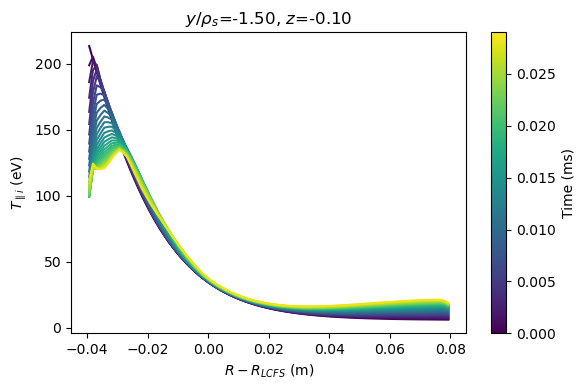

In [3]:
#---------------- Profile plots
# -- datatoplot
# field = 'phi'
# field = 'ne'
field = 'Tpari'
#-- Plane location
cdirection='x'; ccoords=[0.0,0.0]
# cdirection='y'; ccoords=[0.0,0.0]
# cdirection='z'; ccoords=[0.045,0.0]
twindow = tfs[:30]
#----------------
plot_1D_time_evolution(simulation,field,cdirection,ccoords,twindow,space_time=False)

In [4]:
#---------- 2D cut movie
#-- choose the data to be plot
# -- datatoplot
# field = 'phi'
# field = 'ne'
field = 'Tpari'
# field = 'upari'

#-- choose min and max time frames and cut location
tf_bounds = [160, 210]
cplane=['x','y']; ccoord=31

subtfs = [t for t in tfs if (t >= tf_bounds[0] and t<= tf_bounds[1])];
make_2D_movie(simulation, field, cplane, ccoord, subtfs)

movie movie_Tpari_xy=31.00.gif created.
